In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 16})

In [2]:
# setting default fontsizes for plots

s=24# CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
plt.rcParams['savefig.facecolor']='white'
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'



Read in restricted behavioral data:

In [ ]:
res_behav_data = pd.read_csv('../data/RESTRICTED_esfinn_11_21_2021_19_19_35.csv')
res_behav_data.set_index("Subject", inplace=True)
res_behav_data.index = res_behav_data.index.map(str)
print(res_behav_data.shape)
res_behav_data.head()

Read in unrestricted behavioral data:

In [ ]:
unres_behav_data = pd.read_csv('../data/unrestricted_esfinn_11_21_2021_19_19_13.csv')
unres_behav_data.set_index("Subject", inplace=True)
unres_behav_data.index = unres_behav_data.index.map(str)
print(unres_behav_data.shape)
unres_behav_data.head()

Combine restricted and unrestricted behavioral data into a single dataframe:

In [ ]:
behav_data = pd.concat([res_behav_data, unres_behav_data], axis=1)
print(behav_data.shape)
behav_data.head()

Read in task response data, join into single dataframe, then join this with the larger dataframe:

In [ ]:
task_data = pd.read_csv('../data/1a_S_NS_responses_per_subj.csv')
task_data.set_index("subj_idx", inplace=True)
task_data.index.rename("Subject", inplace=True)
task_data.index = task_data.index.map(str)
print(task_data.shape)
task_data.head()

In [ ]:
task_data2 = pd.read_csv('../data/1d_S_NS_pc_uncertainResp_per_subj.csv')
task_data2.set_index("subj_idx", inplace=True)
task_data2.index.rename("Subject", inplace=True)
task_data2.index = task_data2.index.map(str)
task_data2["pc_unc_total"] = (task_data2["pc_unc_Mental"] + task_data2["pc_unc_Rand"])/2
print(task_data2.shape)
task_data2.head()

In [ ]:
task_data = task_data.join(task_data2, how='inner')
print(task_data.shape)
task_data.head()

In [ ]:
data = task_data.join(behav_data, how='inner')
print(data.shape)
data.head()

In [ ]:
task_data

Explore correlations between proportion of "social" responses and various trait phenotypes:

In [12]:
def explore_correlation(x, y, data=data):
    """
    Calculates and plots correlation between x and y variables in dataframe `data`, plus distribution of x and y 
    """
    sns.set_style("white")
    
    inds = ~np.isnan(data[x]) & ~np.isnan(data[y]) # find rows where neither x or y is NaN

    g = sns.jointplot(x=x, y=y, data=data, kind='reg', color='gray')

    # Calculate and print correlations
    rp, pp = stats.pearsonr(data[x][inds], data[y][inds])
    rs, ps = stats.spearmanr(data[x][inds], data[y][inds])
    g.ax_joint.annotate(f'r_s = {rs:.2f}\n(p={ps:.1g})', xy=(.05,.8), xycoords='axes fraction')
    #g.ax_joint.annotate(f'r_s = {rs:.2f}\n(p={ps:.1e})', xy=(.05,.8), xycoords='axes fraction')
    
    return g

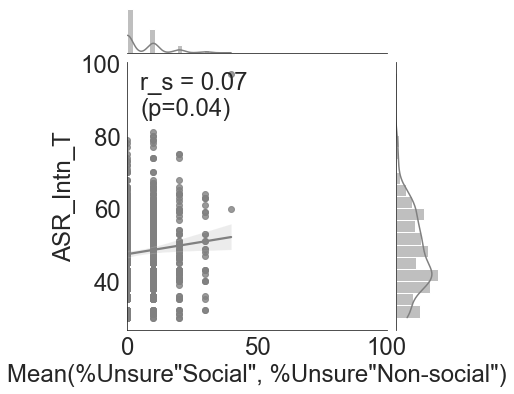

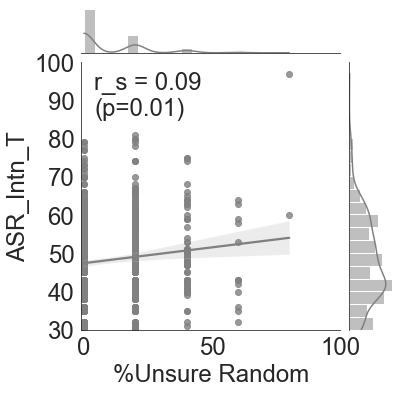

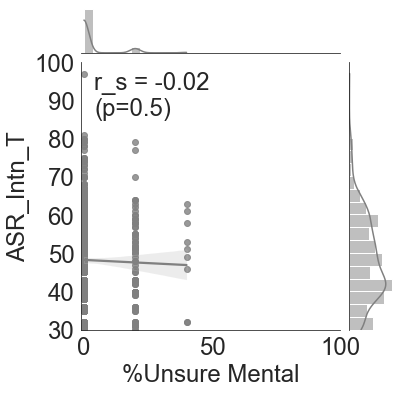

In [13]:
x = "pc_unc_total"

g = explore_correlation(x, y="ASR_Intn_T")
plt.xlabel('Mean(%Unsure"Social", %Unsure"Non-social")')
plt.xlim(0,100)
#g.savefig('../results/soc-nonsoc_vs_loneliness.png')

x = "pc_unc_Rand"

g = explore_correlation(x, y="ASR_Intn_T")
plt.xlabel('%Unsure Random')
plt.xlim(-1,100)
plt.ylim(30,100)
plt.yticks(10*np.arange(3,11))
g.savefig('../results/unsure_random_vs_asr.png')

x = "pc_unc_Mental"

g = explore_correlation(x, y="ASR_Intn_T")
plt.xlabel('%Unsure Mental')
plt.xlim(-1,100)
plt.ylim(30,100)
plt.yticks(10*np.arange(3,11))
g.savefig('../results/unsure_mental_vs_asr.png')

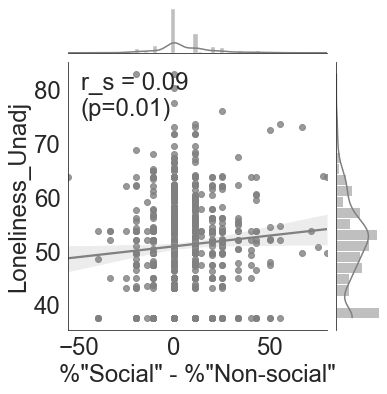

In [16]:
x = "Soc-NonSoc_pc"

g = explore_correlation(x, y="Loneliness_Unadj")
plt.xlabel('%"Social" - %"Non-social"')
g.savefig('../results/soc-nonsoc_vs_loneliness.png')

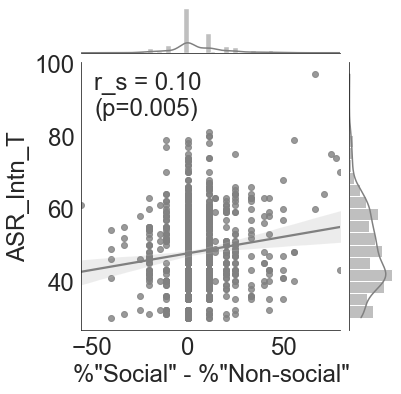

In [17]:
x = "Soc-NonSoc_pc"
y = "ASR_Intn_T"

g = explore_correlation(x, y)
plt.xlabel('%"Social" - %"Non-social"')
g.savefig('../results/soc-nonsoc_vs_ASRIntnT.png')

# externalization score

Text(0.5, 19.99999999999995, '%"Social" - %"Non-social"')

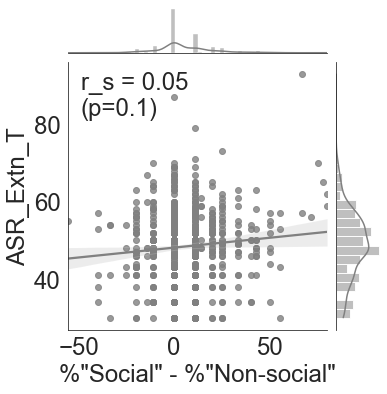

In [49]:
x = "Soc-NonSoc_pc"
y = "ASR_Extn_T"

g = explore_correlation(x, y)
plt.xlabel('%"Social" - %"Non-social"')


([<matplotlib.axis.YTick at 0x7fb51248ae10>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, '')])

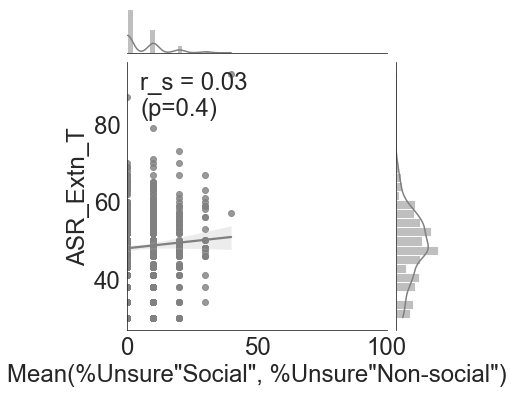

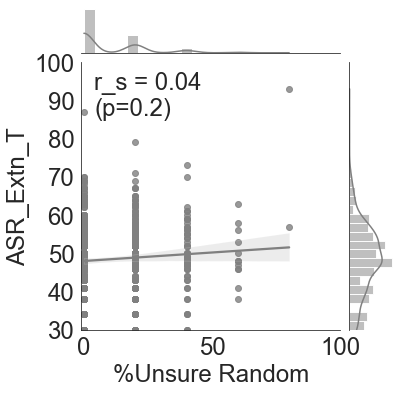

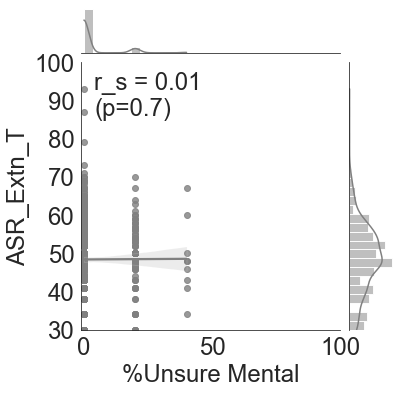

In [51]:
x = "pc_unc_total"
y = "ASR_Extn_T"

g = explore_correlation(x, y)
plt.xlabel('Mean(%Unsure"Social", %Unsure"Non-social")')
plt.xlim(0,100)
#g.savefig('../results/soc-nonsoc_vs_loneliness.png')

x = "pc_unc_Rand"

g = explore_correlation(x, y)
plt.xlabel('%Unsure Random')
plt.xlim(-1,100)
plt.ylim(30,100)
plt.yticks(10*np.arange(3,11))

x = "pc_unc_Mental"

g = explore_correlation(x, y)
plt.xlabel('%Unsure Mental')
plt.xlim(-1,100)
plt.ylim(30,100)
plt.yticks(10*np.arange(3,11))


In [20]:
x = 'ASR_Intn_T'
y = 'pc_unc_Rand'
z = 'pc_unc_Mental'

inds = ~np.isnan(data[x]) & ~np.isnan(data[y]) & ~np.isnan(data[z])

n = inds.sum()
xy = stats.spearmanr(data[x][inds], data[y][inds])[0]
xz = stats.spearmanr(data[x][inds], data[z][inds])[0]
yz = stats.spearmanr(data[y][inds], data[z][inds])[0]

dependent_corr(xy, xz, yz, n, twotailed=False)

(2.2965784482099707, 0.010948142991091592)

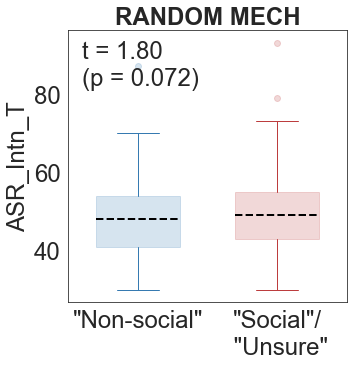

In [56]:
#data1 = data.loc[data['rand_mech_response']!=9,:]
#data1.shape
fig, ax = plt.subplots(figsize=(5,5))

y = "ASR_Extn_T"
#x = "rand_mech_response"
x = "rand_mech_yesorunsure"
rows = data[x] == 0
bp2 = box_plot(data.loc[rows,y], blue_rgb, blue_rgb,0,True)
rows = data[x] == 1
bp1 = box_plot(data.loc[rows,y], red_rgb, red_rgb,1,True)
plt.xticks(range(2),['"Non-social"','"Social"/\n "Unsure"'])
t, p = stats.ttest_ind(data[data[x]==1][y], data[data[x]==0][y], nan_policy='omit')
plt.ylabel('ASR_Intn_T')
ax.annotate(f't = {t:.2f}\n(p = {p:.2g})', xy=(0.05, 0.8), xycoords='axes fraction')
plt.title('RANDOM MECH',fontweight='bold')
fig.savefig('../results/RANDMECHresp_vs_ASRIntnT.png')


Determine whether the difference in correlation between `Soc-NonSoc_pc` and internalizing vs externalizing symptoms is statistically significant:

In [14]:
x = "Soc-NonSoc_pc"
y = "ASR_Intn_T"
z = "ASR_Extn_T"

inds = ~np.isnan(data[x]) & ~np.isnan(data[y]) & ~np.isnan(data[z])
print(inds.sum())

rs_xy = stats.spearmanr(data[x][inds], data[y][inds])[0]
rs_xz = stats.spearmanr(data[x][inds], data[z][inds])[0]
rs_yz = stats.spearmanr(data[y][inds], data[z][inds])[0]
print(rs_xy)
print(rs_xz)
print(rs_yz)

816
0.09774091538820617
0.05045943183596981
0.5143954463909547


The following function was taken from here: https://github.com/psinger/CorrelationStats/blob/master/corrstats.py

In [18]:
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def rz_ci(r, n, conf_level = 0.95):
    zr_se = pow(1/(n - 3), .5)
    moe = norm.ppf(1 - (1 - conf_level)/float(2)) * zr_se
    zu = atanh(r) + moe
    zl = atanh(r) - moe
    return tanh((zl, zu))

def rho_rxy_rxz(rxy, rxz, ryz):
    num = (ryz-1/2.*rxy*rxz)*(1-pow(rxy,2)-pow(rxz,2)-pow(ryz,2))+pow(ryz,3)
    den = (1 - pow(rxy,2)) * (1 - pow(rxz,2))
    return num/float(den)

def dependent_corr(xy, xz, yz, n, twotailed=True, conf_level=0.95, method='steiger'):
    """
    Calculates the statistic significance between two dependent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between x and z
    @param yz: correlation coefficient between y and z
    @param n: number of elements in x, y and z
    @param twotailed: whether to calculate a one or two tailed test, only works for 'steiger' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'steiger' or 'zou'
    @return: t and p-val
    """
    if method == 'steiger':
        d = xy - xz
        determin = 1 - xy * xy - xz * xz - yz * yz + 2 * xy * xz * yz
        av = (xy + xz)/2
        cube = (1 - yz) * (1 - yz) * (1 - yz)

        t2 = d * np.sqrt((n - 1) * (1 + yz)/(((2 * (n - 1)/(n - 3)) * determin + av * av * cube)))
        p = 1 - t.cdf(abs(t2), n - 3)

        if twotailed:
            p *= 2

        return t2, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(xz, n, conf_level=conf_level)[0]
        U2 = rz_ci(xz, n, conf_level=conf_level)[1]
        rho_r12_r13 = rho_rxy_rxz(xy, xz, yz)
        lower = xy - xz - pow((pow((xy - L1), 2) + pow((U2 - xz), 2) - 2 * rho_r12_r13 * (xy - L1) * (U2 - xz)), 0.5)
        upper = xy - xz + pow((pow((U1 - xy), 2) + pow((xz - L2), 2) - 2 * rho_r12_r13 * (U1 - xy) * (xz - L2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')

In [16]:
n = inds.sum()

xy = stats.spearmanr(data[x][inds], data[y][inds])[0]
xz = stats.spearmanr(data[x][inds], data[z][inds])[0]
yz = stats.spearmanr(data[y][inds], data[z][inds])[0]

dependent_corr(xy, xz, yz, n, twotailed=False)

(1.3742665364218918, 0.08486883214144725)

Look at responses on RANDMECH:

In [17]:
all_trial_data = pd.read_csv('../data/hcp_social_826subs.csv')
all_trial_data.set_index("subj_idx", inplace=True)
all_trial_data.index.rename("Subject", inplace=True)
all_trial_data.index = all_trial_data.index.map(str)
all_trial_data.head()

,index,stim,movie,rt,response,run,accuracy
Subject,,,,,,,
168745,0,Mental,Scaring.AVI,1.252,1,1,1.0
168745,1,Mental,SEDUCING-B.AVI,0.578,1,1,1.0
168745,2,Random,STAR-A.AVI,1.643,0,1,1.0
168745,3,Mental,SURPRISING-B.AVI,1.082,1,1,1.0
168745,4,Random,TENNIS-A.AVI,1.232,0,1,1.0


In [18]:
data = data.join(all_trial_data[all_trial_data["movie"]=="Random mechanical.AVI"]["response"])
data.rename(columns={"response": "rand_mech_response"}, inplace=True)
data.head()

,countNonSoc(No),countSoc(Yes),Yes-No,Yes+No,No_pc,Yes_pc,Soc-NonSoc_pc,pc_unc_Rand,pc_unc_Mental,pc_unc_total,...,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,rand_mech_response
Subject,,,,,,,,,,,,,,,,,,,,,
100206,1.0,9.0,8.0,10.0,10.000000,90.000000,80.000000,0.0,0.0,0.0,...,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84,0
100307,4.0,5.0,1.0,9.0,44.444444,55.555556,11.111111,0.0,20.0,10.0,...,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76,1
100408,4.0,5.0,1.0,9.0,44.444444,55.555556,11.111111,20.0,0.0,10.0,...,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68,9
100610,5.0,5.0,0.0,10.0,50.000000,50.000000,0.000000,0.0,0.0,0.0,...,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88,0
101309,2.0,5.0,3.0,7.0,28.571429,71.428571,42.857143,60.0,0.0,30.0,...,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80,9


In [19]:
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [20]:
#colors = [red_rgb,blue_rgb]
# Set your custom color palette
#myPalette = sns.set_palette(sns.color_palette(colors))

In [21]:
list(col[:2])+[alpha]

NameError: name 'col' is not defined

/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/lines.py:1200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.any(self._markerfacecolor != fc):
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/lines.py:1171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or np.any(self._markeredgecolor != ec)):


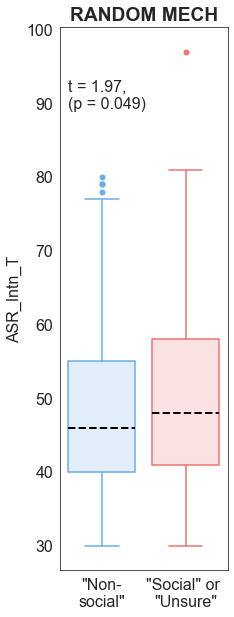

In [22]:
# Create a new variable denoting subjects who responded either "yes" or "unsure"
data["rand_mech_yesorunsure"] = data["rand_mech_response"] > 0

y = "ASR_Intn_T"

fig, ax = plt.subplots(figsize=(3,10))

#sns.set_palette(["tab:blue", "tab:red"])
ax = sns.boxplot(x="rand_mech_yesorunsure", y=y, data=data)
ax.set_xlabel("RANDMECH response")
ax.set_xticklabels(["\"Non-\nsocial\"", "\"Social\" or \n\"Unsure\""])

'''for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, alpha))
 patch.set_edgecolor((r, g, b, 1))'''
 
for i,artist in enumerate(ax.artists):
    if i == 0:
        col = blue_rgb + [alpha]
    else:
        col = red_rgb + [alpha]
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    #col = artist.get_facecolor()
    artist.set_edgecolor(col)
    #artist.set_edgecolor('None')
    artist.set_facecolor(list(col[:3])+[alpha])
    if np.round(col[0],2) ==  .75:
        print(i)
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        if j in [4,10]:
            line.set_color('k')
            line.set_linestyle('--')
            line.set_linewidth(2)
        else:
            line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        if j in [5,11]:
            line.set_marker('o')
plt.xlabel('')
plt.title('RANDOM MECH', fontweight = 'bold')
t, p = stats.ttest_ind(data[data["rand_mech_yesorunsure"]==1][y], data[data["rand_mech_yesorunsure"]==0][y], nan_policy='omit')
ax.annotate(f't = {t:.2f},\n(p = {p:.2g})', xy=(0.05, 0.85), xycoords='axes fraction')

fig.savefig('../results/RANDMECHresp_vs_ASRIntnT.png')


In [23]:
def box_plot(data, edge_color, fill_color,pos,v):
    # customize boxplots
    alpha= .2
    data = data[~np.isnan(data)]
    bp = ax.boxplot(data, positions = [pos], patch_artist=True,widths=.6,vert=v,flierprops = dict(markeredgecolor=edge_color,
    markerfacecolor=fill_color, alpha=alpha))
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for element in ['medians']:
        plt.setp(bp[element], color='k',linewidth=2,ls='dashed')

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color,alpha=alpha)#'w'       
        
    return bp

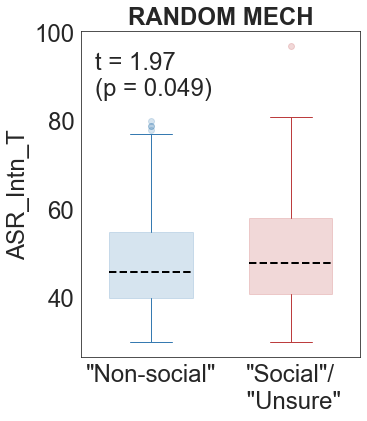

In [58]:
#data1 = data.loc[data['rand_mech_response']!=9,:]
#data1.shape
fig, ax = plt.subplots(figsize=(5,6))

y = "ASR_Intn_T"
#x = "rand_mech_response"
x = "rand_mech_yesorunsure"
rows = data[x] == 0
bp2 = box_plot(data.loc[rows,y], blue_rgb, blue_rgb,0,True)
rows = data[x] == 1
bp1 = box_plot(data.loc[rows,y], red_rgb, red_rgb,1,True)
plt.xticks(range(2),['"Non-social"','"Social"/\n "Unsure"'])
t, p = stats.ttest_ind(data[data[x]==1][y], data[data[x]==0][y], nan_policy='omit')
plt.ylabel('ASR_Intn_T')
ax.annotate(f't = {t:.2f}\n(p = {p:.2g})', xy=(0.05, 0.8), xycoords='axes fraction')
plt.title('RANDOM MECH',fontweight='bold')
fig.savefig('../results/RANDMECHresp_vs_ASRIntnT.png')


In [ ]:
# Create a new variable denoting subjects who responded either "yes" or "unsure"
data["rand_mech_yesorunsure"] = data["rand_mech_response"] > 0

y = "ASR_Intn_T"

fig, ax = plt.subplots(figsize=(5,10))

sns.set_palette(["tab:blue", "tab:red"])
ax = sns.boxplot(x="rand_mech_yesorunsure", y=y, data=data)
ax.set_xlabel("RANDMECH response")
ax.set_xticklabels(["\"Non-social\"", "\"Social\" or \n\"Unsure\""])

t, p = stats.ttest_ind(data[data["rand_mech_yesorunsure"]==1][y], data[data["rand_mech_yesorunsure"]==0][y], nan_policy='omit')
ax.annotate(f't = {t:.2f} (p = {p:.2g})', xy=(0.05, 0.9), xycoords='axes fraction')

#fig.savefig('../results/RANDMECHresp_vs_ASRIntnT.png')


Look at RT on RANDMECH:

In [25]:
data = data.join(all_trial_data[all_trial_data["movie"]=="Random mechanical.AVI"]["rt"])
data = data.rename(columns={"rt": "rand_mech_rt"})
data.head()

,countNonSoc(No),countSoc(Yes),Yes-No,Yes+No,No_pc,Yes_pc,Soc-NonSoc_pc,pc_unc_Rand,pc_unc_Mental,pc_unc_total,...,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,rand_mech_response,rand_mech_yesorunsure,rand_mech_rt
Subject,,,,,,,,,,,,,,,,,,,,,
100206,1.0,9.0,8.0,10.0,10.000000,90.000000,80.000000,0.0,0.0,0.0,...,1.0,49.7,72.63,72.03,1.84,0.0,1.84,0,False,0.683
100307,4.0,5.0,1.0,9.0,44.444444,55.555556,11.111111,0.0,20.0,10.0,...,0.0,38.6,71.69,71.76,1.76,0.0,1.76,1,True,1.057
100408,4.0,5.0,1.0,9.0,44.444444,55.555556,11.111111,20.0,0.0,10.0,...,2.0,52.6,114.01,113.59,1.76,2.0,1.68,9,True,1.536
100610,5.0,5.0,0.0,10.0,50.000000,50.000000,0.000000,0.0,0.0,0.0,...,0.0,38.6,84.84,85.31,1.92,1.0,1.88,0,False,0.994
101309,2.0,5.0,3.0,7.0,28.571429,71.428571,42.857143,60.0,0.0,30.0,...,0.0,38.6,106.39,104.39,1.80,0.0,1.80,9,True,1.567


In [ ]:
g = explore_correlation(x="rand_mech_rt", y="ASR_Intn_T", data=data)

In [ ]:
# Restrict correlation to only subjects that responded "yes" or "unsure"

g = explore_correlation(x="rand_mech_rt", y="ASR_Intn_T", data=data[data["rand_mech_yesorunsure"]==1])